# Análise de dados de vendas de uma loja de roupas

In [120]:
# ​​Analisar os dados de vendas de uma loja de roupas e apresentar um relatório que mostre a quantidade vendida, 
# o valor total arrecadado e o preço médio dos produtos vendidos em cada mês do ano. 

In [122]:
# passo 1: importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
# Lista com os nomes dos produtos
nomes_produtos = ['Camisa Manga Longa', 'Camisa Gola Polo', 'Camiseta Básica', 'Calça Jeans', 'Sapato Social']

In [126]:
# Gerando DataFrame com 1000 linhas
df = pd.DataFrame({
    'ID Produto': np.random.randint(1, 11, 1000),
    'Nome Produto': np.random.choice(nomes_produtos, 1000),
    'Quantidade Vendida': np.random.randint(1, 21, 1000),
    'Preço Unitario': np.round(np.random.uniform(10, 100, 1000), 2),
    'Data da Venda': np.random.choice(pd.date_range(start='2021-01-01', end='2021-12-31'), 1000)
})

In [128]:
# salvando o DataFrame em um arquivo CSV
df.to_csv('vendas.csv', index=False)

In [130]:
# carregando o arquivo CSV em um DataFrame
df = pd.read_csv('vendas.csv')

In [132]:
# descrevendo o conjunto
print(df.describe())

        ID Produto  Quantidade Vendida  Preço Unitario
count  1000.000000         1000.000000     1000.000000
mean      5.475000           10.389000       54.864390
std       2.823357            5.722099       25.892106
min       1.000000            1.000000       10.080000
25%       3.000000            5.000000       32.045000
50%       5.000000           10.000000       55.190000
75%       8.000000           15.250000       76.870000
max      10.000000           20.000000       99.770000


In [134]:
# acessando colunas com .loc
print(df.loc[:, 'ID Produto'])

0      3
1      3
2      4
3      5
4      7
      ..
995    2
996    7
997    6
998    5
999    2
Name: ID Produto, Length: 1000, dtype: int64


In [136]:
# usando map em uma coluna
df['Nome Produto'] = df['Nome Produto'].map(lambda x: x.upper())

In [138]:
# Verificando o nome das colunas
print(df.columns)

# Ordenando o DataFrame pela coluna 'Preço Unitário'
df = df.sort_values(by='Preço Unitario', ascending=False)

print(df.head())

Index(['ID Produto', 'Nome Produto', 'Quantidade Vendida', 'Preço Unitario',
       'Data da Venda'],
      dtype='object')
     ID Produto      Nome Produto  Quantidade Vendida  Preço Unitario  \
743           9  CAMISA GOLA POLO                   7           99.77   
891           6   CAMISETA BÁSICA                  19           99.74   
878           7  CAMISA GOLA POLO                  18           99.60   
415           4   CAMISETA BÁSICA                   1           99.54   
198           7   CAMISETA BÁSICA                  18           99.53   

    Data da Venda  
743    2021-09-12  
891    2021-02-06  
878    2021-07-10  
415    2021-08-28  
198    2021-06-28  


In [140]:
# Verificando o nome das colunas
print(df.columns)

# Selecionando apenas as colunas numéricas para calcular a média
df_numeric = df.select_dtypes(include=[np.number])

# Incluindo a coluna de agrupamento
df_numeric['Nome Produto'] = df['Nome Produto']

# Agrupando o DataFrame pela coluna 'Nome Produto' e calculando a média das colunas numéricas
df_grouped = df_numeric.groupby('Nome Produto').mean()

print(df_grouped)

Index(['ID Produto', 'Nome Produto', 'Quantidade Vendida', 'Preço Unitario',
       'Data da Venda'],
      dtype='object')
                    ID Produto  Quantidade Vendida  Preço Unitario
Nome Produto                                                      
CALÇA JEANS           5.416290           10.217195       53.074163
CAMISA GOLA POLO      5.571429           10.647959       57.277296
CAMISA MANGA LONGA    5.475248           10.415842       55.045347
CAMISETA BÁSICA       5.401961           10.887255       52.923235
SAPATO SOCIAL         5.525424            9.711864       56.458475


In [142]:
# selecionando apenas as linhas do dataframe onde a coluna 'ID Produto' é igual a 2
df = df.loc[df['ID Produto'] == 2]

In [144]:
# removendo duplicatas do dataframe
df = df.drop_duplicates()

In [146]:
# acessando colunas usando iloc
print(df.iloc[:, 1])

353      CAMISA GOLA POLO
503           CALÇA JEANS
848      CAMISA GOLA POLO
999       CAMISETA BÁSICA
152       CAMISETA BÁSICA
              ...        
71     CAMISA MANGA LONGA
429       CAMISETA BÁSICA
888           CALÇA JEANS
240         SAPATO SOCIAL
816    CAMISA MANGA LONGA
Name: Nome Produto, Length: 101, dtype: object


In [148]:
# calculando a média de vendas por produto
media_vendas_produto = df.groupby('Nome Produto')['Quantidade Vendida'].mean()

In [150]:
# imprimindo a media de vendas por produto
print('Média de vendas por produto:')
print(media_vendas_produto)

Média de vendas por produto:
Nome Produto
CALÇA JEANS           10.650000
CAMISA GOLA POLO       9.863636
CAMISA MANGA LONGA     9.952381
CAMISETA BÁSICA        9.363636
SAPATO SOCIAL         11.437500
Name: Quantidade Vendida, dtype: float64


In [152]:
# acessando a célula da segunda linha e quarta coluna
valor_celula = df.iloc[1, 3]
print('Valor da célula na segunda çomja e quarta coluna:')
print(valor_celula)

Valor da célula na segunda çomja e quarta coluna:
97.91


In [154]:
# salvando dataframe modificado em um novo arquivo csv
df.to_csv('vendas_modificado.csv', index=False)

In [170]:
df_grouped = df.groupby('Nome Produto').mean()

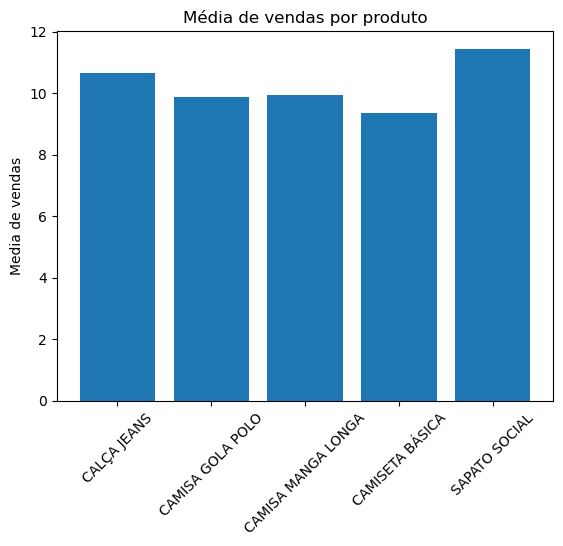

In [172]:
# gerando gráfico de barras com as médias de vendas por produto
plt.bar(df_grouped.index, df_grouped['Quantidade Vendida'])
plt.xticks(rotation=45)
plt.ylabel('Media de vendas')
plt.title('Média de vendas por produto')
plt.show()

In [186]:
# passo 7: exibir o relatório:
print(df_grouped)

                    ID Produto  Quantidade Vendida  Preço Unitario  \
Nome Produto                                                         
CALÇA JEANS                2.0           10.650000       58.342000   
CAMISA GOLA POLO           2.0            9.863636       57.515455   
CAMISA MANGA LONGA         2.0            9.952381       47.237143   
CAMISETA BÁSICA            2.0            9.363636       51.854545   
SAPATO SOCIAL              2.0           11.437500       50.356875   

                                   Data da Venda     Ano       Mês  
Nome Produto                                                        
CALÇA JEANS        2021-07-11 09:36:00.000000000  2021.0  6.800000  
CAMISA GOLA POLO   2021-07-12 13:05:27.272727296  2021.0  6.772727  
CAMISA MANGA LONGA 2021-07-09 21:42:51.428571392  2021.0  6.809524  
CAMISETA BÁSICA    2021-07-09 01:05:27.272727296  2021.0  6.772727  
SAPATO SOCIAL      2021-07-02 15:00:00.000000000  2021.0  6.562500  


In [188]:
df_grouped

,ID Produto,Quantidade Vendida,Preço Unitario,Data da Venda,Ano,Mês
Nome Produto,,,,,,
CALÇA JEANS,2.0,10.650000,58.342000,2021-07-11 09:36:00.000000000,2021.0,6.800000
CAMISA GOLA POLO,2.0,9.863636,57.515455,2021-07-12 13:05:27.272727296,2021.0,6.772727
CAMISA MANGA LONGA,2.0,9.952381,47.237143,2021-07-09 21:42:51.428571392,2021.0,6.809524
CAMISETA BÁSICA,2.0,9.363636,51.854545,2021-07-09 01:05:27.272727296,2021.0,6.772727
SAPATO SOCIAL,2.0,11.437500,50.356875,2021-07-02 15:00:00.000000000,2021.0,6.562500
